In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import torch

In [31]:
train_df = pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Train-Dev split

Since the dataset is already flattened and shuffled sufficiently, we can directly split the dataframe without any additional constraints.

In [13]:
X = train_df.drop(columns='label')
y = train_df['label']

In [33]:
X_train_df, X_dev_df, y_train_df, y_dev_df = train_test_split(X,y,test_size=0.1,random_state=42)
X_train_df.shape,y_train_df.shape,X_dev_df.shape,y_dev_df.shape

((37800, 784), (37800,), (4200, 784), (4200,))

In [34]:
X_test_df = test_df.copy()
X_test_df.shape

(28000, 784)

#### Converting dataframe into n-d array(tensor)

In [42]:
X_train = torch.tensor(X_train_df.values)
y_train = torch.tensor(y_train_df.values)
X_dev = torch.tensor(X_dev_df.values)
y_dev = torch.tensor(y_dev_df.values)
X_test = torch.tensor(X_test_df.values)
X_train.shape,y_train.shape,X_dev.shape,y_dev.shape,X_test.shape

(torch.Size([37800, 784]),
 torch.Size([37800]),
 torch.Size([4200, 784]),
 torch.Size([4200]),
 torch.Size([28000, 784]))

#### Visualizing a sample from the data

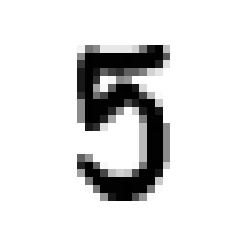

In [49]:
k = 101
plt.imshow(X_train[k].reshape(28,28), cmap=mpl.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

#### Defining a neural network